In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.37'

In [8]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [9]:
grp1=pd.read_excel('Weak_Diads.xlsx')
grp2=pd.read_excel('Strong_Diads.xlsx')
grp3=pd.read_excel('Medium_Diads.xlsx')
df2=pd.concat([grp1, grp2, grp3], axis=0)
df2.head()

,Unnamed: 0,filename,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,Diad1_Prop_Lor,...,Diad2_refit,HB1_Cent,HB1_Area,HB1_Sigma,HB2_Cent,HB2_Area,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma
0,0,POC35,102.885283,1286.308124,3727.037090,1286.308124,6232.818431,0.689959,11.102441,0.381855,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,POC36,102.858894,1286.380164,3190.855505,1286.380164,5128.240826,0.668963,10.222763,0.357189,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,POC37,102.833713,1286.448246,2444.504771,1286.448246,3841.797300,0.659132,7.732273,0.335388,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,POC38,102.811068,1286.490986,2228.305179,1286.490986,3445.381891,0.652176,7.012396,0.319838,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,POC39,102.807497,1286.514190,2007.683844,1286.514190,3101.911863,0.652763,6.835194,0.315190,...,Flagged Warnings:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


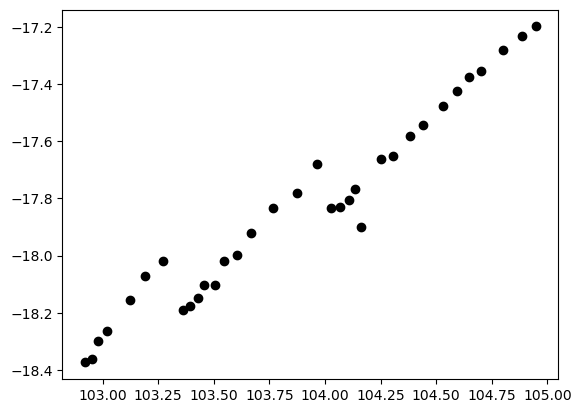

In [10]:
plt.plot(df2['Splitting'], df2['C13_Cent']-df2['Diad2_Combofit_Cent'], 'ok')

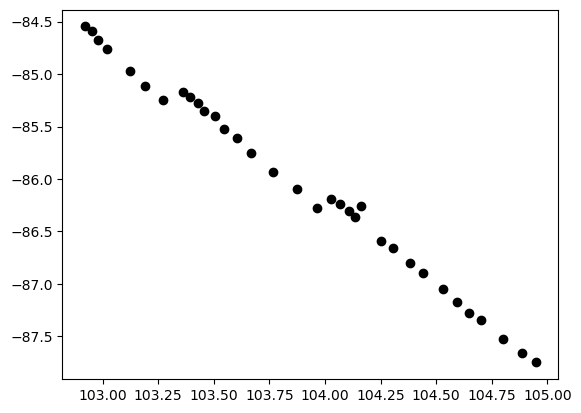

In [11]:

plt.plot(df2['Splitting'], df2['Diad1_Combofit_Cent']-df2['C13_Cent'], 'ok')

In [12]:
## C13 

## Hot band diad distance

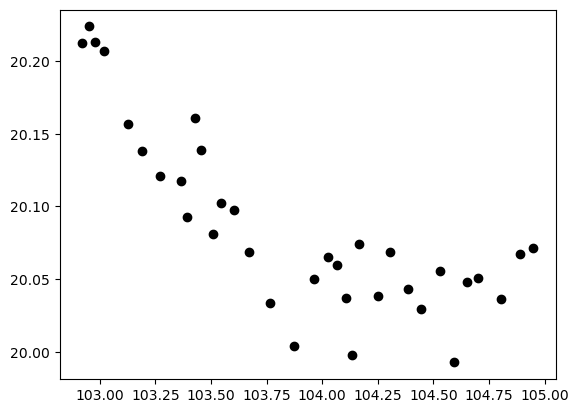

In [13]:
plt.plot(df2['Splitting'], df2['Diad1_Combofit_Cent']-df2['HB1_Cent'], 'ok')

(-30.0, -10.0)

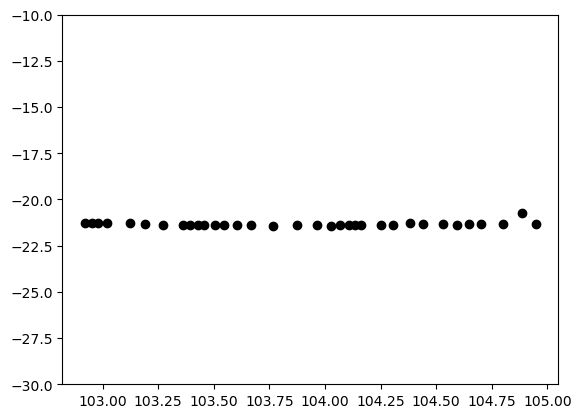

In [14]:
plt.plot(df2['Splitting'], df2['Diad2_Combofit_Cent']-df2['HB2_Cent'], 'ok')
plt.ylim([-30, -10])

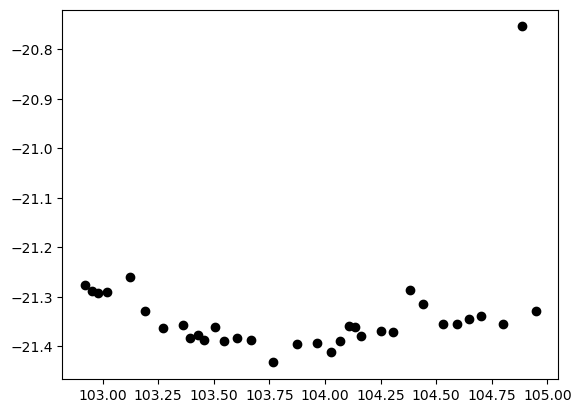

In [15]:
plt.plot(df2['Splitting'], df2['Diad2_Combofit_Cent']-df2['HB2_Cent'], 'ok')

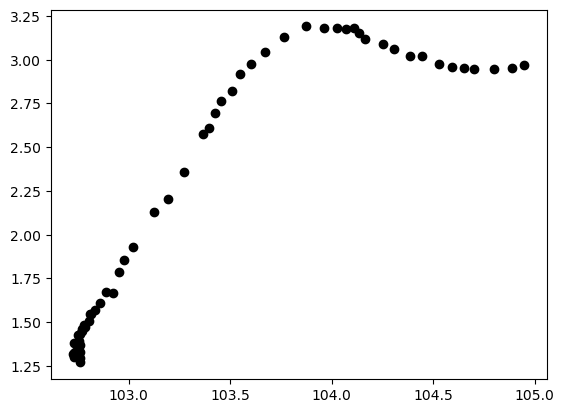

In [16]:
plt.plot(df2['Splitting'], df2['Diad1_Voigt_Area']/df2['Diad1_Combofit_Height'], 'ok')

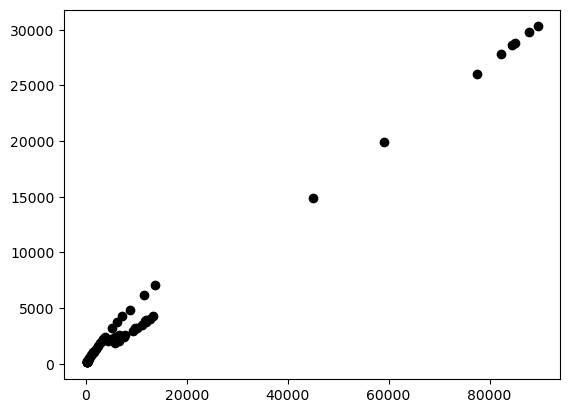

In [17]:
plt.plot(df2['Diad1_Voigt_Area'], df2['Diad1_Combofit_Height'], 'ok')

## Combine with charlottes data

In [18]:
df_D=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

## Compare

## First, get the metadata for this day

In [19]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_diad_files(path=meta_path,
file_ext='txt', exclude_str='N', 
            exclude_str_2='FG', 
            exclude_str_3='Cap',
                            exclude_str_4='window',
            exclude_type='.png',   sort=True)
diad_meta

['POC1.txt',
 'POC10.txt',
 'POC11.txt',
 'POC12.txt',
 'POC13.txt',
 'POC14.txt',
 'POC15.txt',
 'POC16.txt',
 'POC17.txt',
 'POC18.txt',
 'POC19.txt',
 'POC2.txt',
 'POC20.txt',
 'POC21.txt',
 'POC22.txt',
 'POC23.txt',
 'POC24.txt',
 'POC25.txt',
 'POC26.txt',
 'POC27.txt',
 'POC28.txt',
 'POC29.txt',
 'POC3.txt',
 'POC30.txt',
 'POC31.txt',
 'POC32.txt',
 'POC33.txt',
 'POC34.txt',
 'POC35.txt',
 'POC36.txt',
 'POC37.txt',
 'POC38.txt',
 'POC39.txt',
 'POC4.txt',
 'POC40.txt',
 'POC41.txt',
 'POC42.txt',
 'POC43.txt',
 'POC44.txt',
 'POC45.txt',
 'POC46.txt',
 'POC47.txt',
 'POC48.txt',
 'POC49.txt',
 'POC5.txt',
 'POC50.txt',
 'POC51.txt',
 'POC52.txt',
 'POC53.txt',
 'POC54.txt',
 'POC55.txt',
 'POC56.txt',
 'POC57-0.04.txt',
 'POC58.txt',
 'POC6.txt',
 'POC7.txt',
 'POC8.txt',
 'POC9.txt']

## Now get all the important information out of the metadata files

In [20]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=diad_meta, prefix=False,
trupower=False)
meta['filename'].iloc[0]

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 28.18it/s]

Done
Oof, try not to work after midnight!


'POC49.txt'

## Then get a simple file name you can stitch with the spectra

In [21]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

'POC49'

## Now get filename from spectra into same form as metadata

In [22]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=False, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['POC35', 'POC36', 'POC37', 'POC38', 'POC39', 'POC40', 'POC41',
       'POC42', 'POC43', 'POC44', 'POC45', 'POC46', 'POC47', 'POC48',
       'POC49', 'POC50', 'POC51', 'POC52', 'POC53', 'POC54', 'POC55',
       'POC56', 'POC57-0.04', 'POC58', 'POC1', 'POC2', 'POC3', 'POC4',
       'POC5', 'POC6', 'POC7', 'POC8', 'POC10', 'POC11', 'POC12', 'POC13',
       'POC14', 'POC15', 'POC16', 'POC17', 'POC18', 'POC19', 'POC20',
       'POC21', 'POC22', 'POC23', 'POC24', 'POC25', 'POC26', 'POC27',
       'POC28', 'POC29', 'POC30', 'POC31', 'POC32', 'POC33', 'POC34',
       'POC9'], dtype=object)

In [23]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [24]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_cali.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [25]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [26]:
df_combo

,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Residual_Diad1,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0,102.947386,POC35,102.885283,1286.308124,3727.037090,1286.308124,6232.818431,0.689959,11.102441,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:12:18 PM\n,79938.0,1341.0,1.000604
1,0,102.921014,POC36,102.858894,1286.380164,3190.855505,1286.380164,5128.240826,0.668963,10.222763,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:18:55 PM\n,80335.0,1341.0,1.000604
2,0,102.895854,POC37,102.833713,1286.448246,2444.504771,1286.448246,3841.797300,0.659132,7.732273,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:26:06 PM\n,80766.0,1341.0,1.000604
3,0,102.873224,POC38,102.811068,1286.490986,2228.305179,1286.490986,3445.381891,0.652176,7.012396,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:31:51 PM\n,81111.0,1341.0,1.000605
4,0,102.869702,POC39,102.807497,1286.514190,2007.683844,1286.514190,3101.911863,0.652763,6.835194,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:41:24 PM\n,81684.0,1341.0,1.000605
5,0,102.866276,POC40,102.804039,1286.536014,1867.760973,1286.536014,2810.548562,0.644063,6.735633,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:47:37 PM\n,82057.0,1341.0,1.000605
6,0,102.839460,POC41,102.777199,1286.565686,1586.937231,1286.565686,2354.903020,0.630602,5.219752,...,28.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",10:54:43 PM\n,82483.0,1341.0,1.000606
7,0,102.843838,POC42,102.781538,1286.584263,1307.347072,1286.584263,1925.645146,0.638770,4.595444,...,28.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",11:00:50 PM\n,82850.0,1341.0,1.000606
8,0,102.833755,POC43,102.771420,1286.598050,1087.840056,1286.598050,1589.584192,0.632797,4.106269,...,28.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",11:07:52 PM\n,83272.0,1341.0,1.000607
9,0,102.831515,POC44,102.769134,1286.609839,1027.777608,1286.609839,1487.657653,0.624375,3.775415,...,28.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",11:15:27 PM\n,83727.0,1341.0,1.000607


In [27]:
df_combo['Measurement']=df_combo['filename_x']
dfs_merge=pd.merge(df_D, df_combo, on='Measurement')

In [28]:
dfs_merge=dfs_merge.loc[dfs_merge['Splitting'].between(100, 110)]

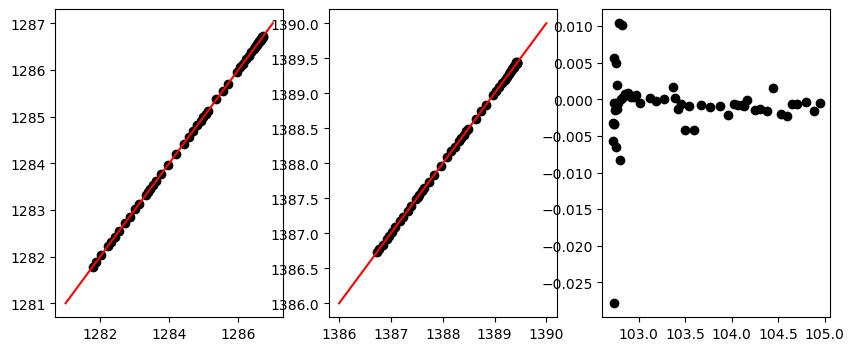

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.plot(dfs_merge['1285cm-1'], dfs_merge['Diad1_Combofit_Cent'], 'ok')
ax1.plot([1281, 1287], [1281, 1287], '-r')

ax2.plot(dfs_merge['1389cm-1'], dfs_merge['Diad2_Combofit_Cent'], 'ok')
ax2.plot([1386, 1390], [1386, 1390], '-r')

ax3.plot(dfs_merge['∆CO2 uncorr (cm-1)'], dfs_merge['∆CO2 uncorr (cm-1)']-dfs_merge['Splitting'], 'ok')
#ax3.plot([102, 105], [102, 105], '-r')

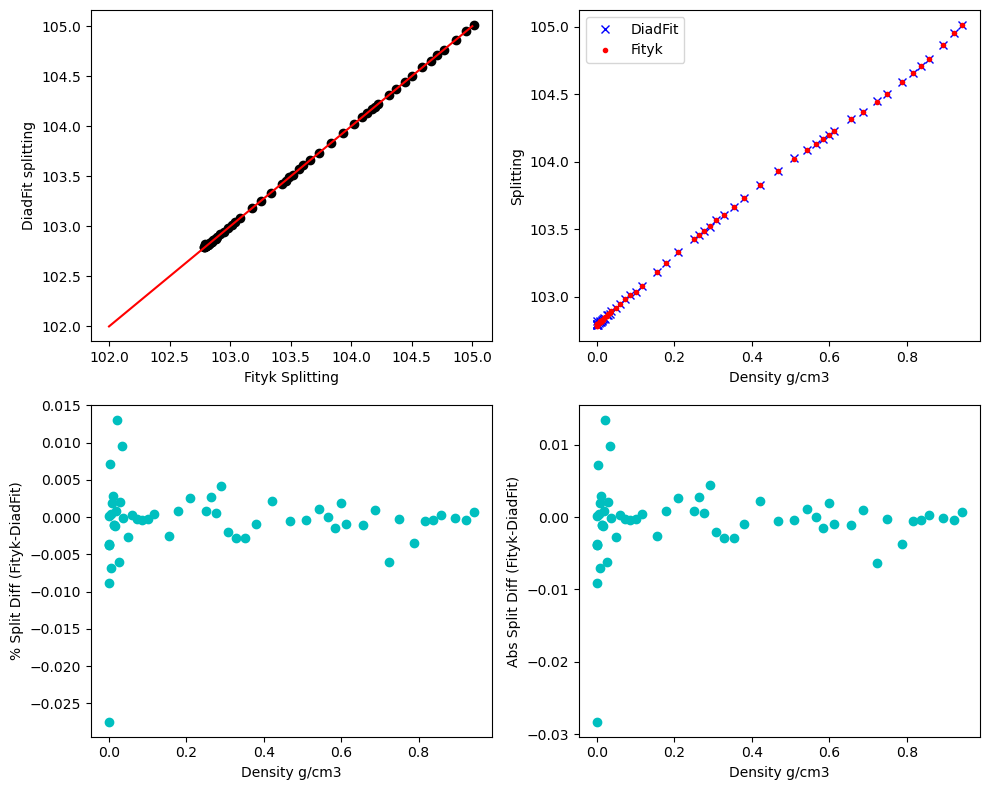

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

ax1.plot(dfs_merge['∆CO2 corr (cm-1-Lam)'], dfs_merge['Corrected_Splitting'], 'ok')
ax1.plot([102, 105], [102, 105], '-r')



ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['Corrected_Splitting'],
         'xb', label='DiadFit')

ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)'],
         '.r', label='Fityk')

ax3.plot(dfs_merge['Density  (g/ml)'],
         100*((dfs_merge['∆CO2 corr (cm-1-Lam)']-dfs_merge['Corrected_Splitting'])/dfs_merge['Corrected_Splitting']),
         'oc', label='DiadFit')

ax4.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)']-dfs_merge['Corrected_Splitting'],
         'oc', label='DiadFit')

ax2.legend()

ax1.set_xlabel('Fityk Splitting')
ax1.set_ylabel('DiadFit splitting')

ax2.set_xlabel('Density g/cm3')
ax2.set_ylabel('Splitting')

ax3.set_xlabel('Density g/cm3')
ax3.set_ylabel('% Split Diff (Fityk-DiadFit)')

ax4.set_xlabel('Density g/cm3')
ax4.set_ylabel('Abs Split Diff (Fityk-DiadFit)')

fig.tight_layout()

In [77]:
Diff=dfs_merge['∆CO2 corr (cm-1-Lam)']-dfs_merge['Corrected_Splitting']
dfs_merge['Measurement'].loc[np.abs(Diff)>0.005]

8      POC9
37    POC38
39    POC40
40    POC41
47    POC48
49    POC50
53    POC54
55    POC58
Name: Measurement, dtype: object

In [88]:
dfs_merge['∆CO2 uncorr (cm-1)'].loc[dfs_merge['Measurement']=='POC40']

39    102.7958
Name: ∆CO2 uncorr (cm-1), dtype: float64

In [89]:
dfs_merge['Splitting'].loc[dfs_merge['Measurement']=='POC40']

39    102.804131
Name: Splitting, dtype: float64

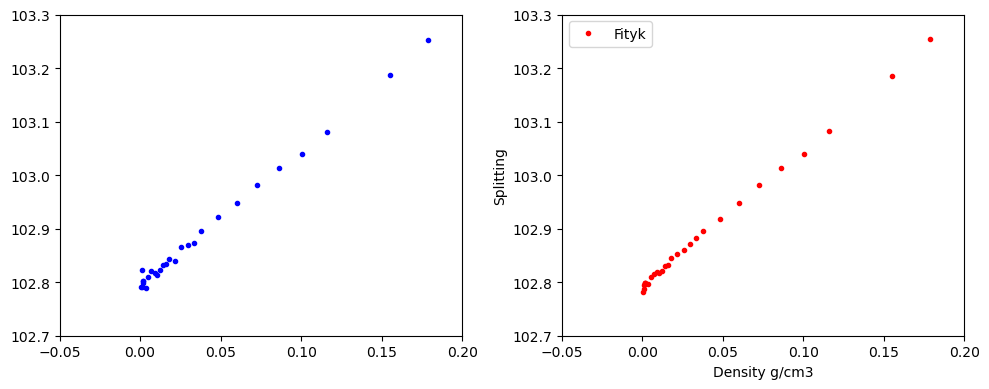

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))


lowdensity=dfs_merge['Density  (g/ml)'].between(0, 0.2)
ax1.plot(dfs_merge['Density  (g/ml)'].loc[lowdensity],
         dfs_merge['Corrected_Splitting'].loc[lowdensity],
         '.b', label='DiadFit')

ax2.plot(dfs_merge['Density  (g/ml)'].loc[lowdensity],
         dfs_merge['∆CO2 corr (cm-1-Lam)'].loc[lowdensity],
         '.r', label='Fityk')
ax2.set_xlim([-0.05, 0.2])
ax2.set_ylim([102.7, 103.3])

ax1.set_xlim([-0.05, 0.2])
ax1.set_ylim([102.7, 103.3])
ax2.legend()


ax2.set_xlabel('Density g/cm3')
ax2.set_ylabel('Splitting')

fig.tight_layout()

In [36]:
import Thermobar as pt
pt.calculate_R2(dfs_merge['Density  (g/ml)'].loc[lowdensity],
         dfs_merge['Corrected_Splitting'].loc[lowdensity], xy=False)

{'R2': '1.00',
 'RMSE': '102.85',
 'RMSE_num': 102.85,
 'P_val': '0.000',
 'Median': '102.82',
 'Mean': '102.85',
 'Int': array([102.79501363]),
 'Grad': array([2.52606484])}

In [37]:
import Thermobar as pt
pt.calculate_R2(dfs_merge['Density  (g/ml)'].loc[lowdensity],
         dfs_merge['∆CO2 corr (cm-1-Lam)'].loc[lowdensity], xy=False)

{'R2': '1.00',
 'RMSE': '102.85',
 'RMSE_num': 102.85,
 'P_val': '0.000',
 'Median': '102.82',
 'Mean': '102.85',
 'Int': array([102.79312934]),
 'Grad': array([2.54588996])}

Text(0, 0.5, 'Diad2_fwhm')

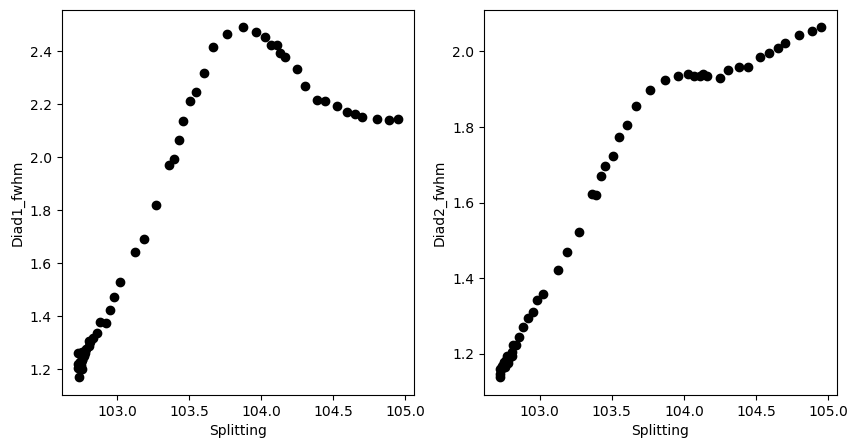

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(dfs_merge['Splitting'], dfs_merge['Diad1_fwhm'], 'ok')
#plt.xlim([100, 106])
ax1.set_xlabel('Splitting')
ax1.set_ylabel('Diad1_fwhm')

ax2.plot(dfs_merge['Splitting'], dfs_merge['Diad2_fwhm'], 'ok')
#plt.xlim([100, 106])
ax2.set_xlabel('Splitting')
ax2.set_ylabel('Diad2_fwhm')


In [31]:
dfs_merge['Diad1_Voigt_Sigma']/dfs_merge['Diad1_fwhm']

0     0.5
1     0.5
2     0.5
3     0.5
4     0.5
5     0.5
6     0.5
7     0.5
8     0.5
9     0.5
10    0.5
11    0.5
12    0.5
13    0.5
14    0.5
15    0.5
16    0.5
17    0.5
18    0.5
19    0.5
20    0.5
21    0.5
22    0.5
23    0.5
25    0.5
26    0.5
27    0.5
28    0.5
29    0.5
30    0.5
31    0.5
32    0.5
33    0.5
34    0.5
35    0.5
36    0.5
37    0.5
38    0.5
39    0.5
40    0.5
41    0.5
42    0.5
43    0.5
44    0.5
45    0.5
46    0.5
47    0.5
48    0.5
49    0.5
50    0.5
51    0.5
52    0.5
53    0.5
54    0.5
55    0.5
dtype: float64

Text(0, 0.5, 'Diad 1 fwhm')

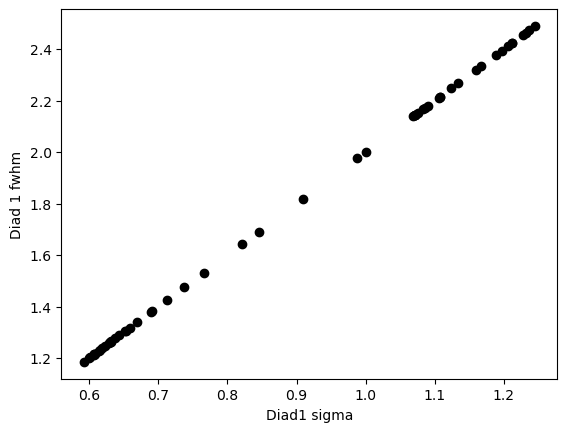

In [30]:
plt.plot(dfs_merge['Diad1_Voigt_Sigma'], dfs_merge['Diad1_fwhm'], 'ok')
plt.xlabel('Diad1 sigma')
plt.ylabel('Diad 1 fwhm')

Text(0, 0.5, 'Diad2_sigma')

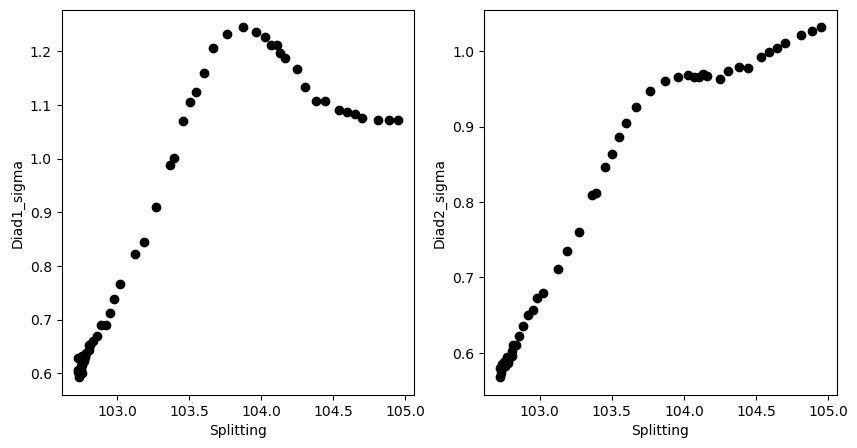

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(dfs_merge['Splitting'], dfs_merge['Diad1_Voigt_Sigma'], 'ok')
#plt.xlim([100, 106])
ax1.set_xlabel('Splitting')
ax1.set_ylabel('Diad1_sigma')

ax2.plot(dfs_merge['Splitting'], dfs_merge['Diad2_Voigt_Sigma'], 'ok')
#plt.xlim([100, 106])
ax2.set_xlabel('Splitting')
ax2.set_ylabel('Diad2_sigma')


Text(0, 0.5, 'Diad1_fwhm')

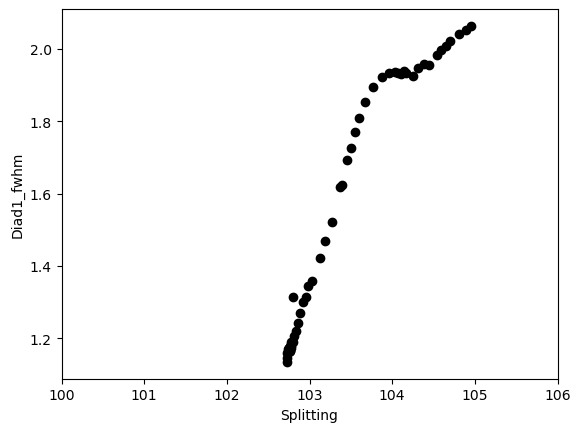

In [25]:
plt.plot(dfs_merge['Splitting'], dfs_merge['Diad2_fwhm'], 'ok')
plt.xlim([100, 106])
plt.xlabel('Splitting')
plt.ylabel('Diad1_fwhm')

In [32]:
dfs_merge.to_excel('Cell_fitting_params.xlsx')